# Data Analysis

In this notebook, we will explore the dataset to understand its structure, get valuable insights and unedrstand how housing prices changed over the years

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data
Load the training and testing datasets using pandas.

In [54]:
# Paths
train_path = "../cleaned_data/train_clean.csv"
test_path = "../cleaned_data/test_clean.csv"

# Load
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)


train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,4,...,False,False,False,False,True,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,3,...,False,False,False,False,True,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,4,...,False,False,False,False,True,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,3,...,False,False,False,False,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,4,...,False,False,False,False,True,False,False,False,True,False


### Data Shape and Columns
Display the shape of the test dataset and the columns of the training dataset to understand the data structure.

In [55]:
print(test.shape)
print(train.columns)

(1459, 230)
Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=231)


### Neighborhood Feature Engineering
Extract neighborhood information from one-hot encoded columns and create a new 'Neighborhood' column. Then, save the modified training data to a CSV file.

In [56]:
import os

neigh_cols = [col for col in train.columns if col.startswith("Neighborhood_")]
train["Neighborhood"] = train[neigh_cols].idxmax(axis=1).str.replace("Neighborhood_", "")
train = train.drop(columns=neigh_cols)

output_path = os.path.join("..", "src", "tableau_resource")
if not os.path.exists(output_path):
    os.makedirs(output_path)

output_file = os.path.join(output_path, "train_tableau.csv")
train.to_csv(output_file, index=False)


### Sale Price Distribution
Visualize the distribution of sale prices using a histogram with kernel density estimation.

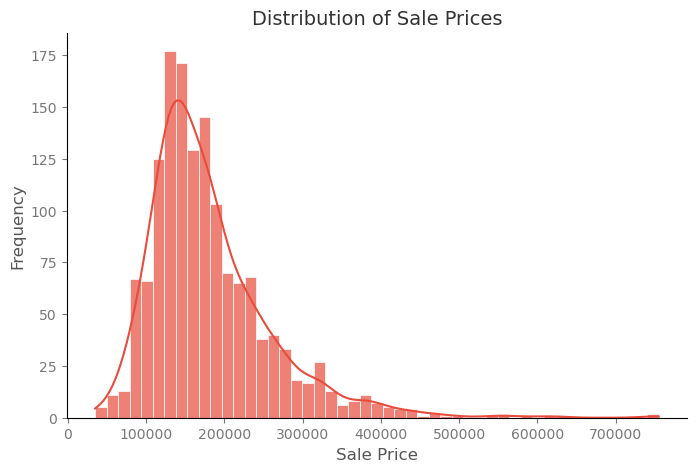

In [57]:
plt.figure(figsize=(8,5))
sns.histplot(train['SalePrice'], kde=True, color="#e74c3c", edgecolor="white", linewidth=0.5, alpha=0.7)
plt.title("Distribution of Sale Prices", fontsize=14, color="#333333")
plt.xlabel("Sale Price", fontsize=12, color="#555555")
plt.ylabel("Frequency", fontsize=12, color="#555555")
plt.tick_params(axis='both', colors="#777777")
sns.despine()
plt.show()


### Correlation Analysis
Calculate the correlation matrix and identify the top correlated features with 'SalePrice'.

In [58]:
corr = train.corr(numeric_only=True)
corr.tail(10)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
SaleType_ConLI,-0.058765,-0.001244,0.009412,0.001076,0.004269,0.001299,0.002975,0.011175,0.015601,0.020842,...,1.000000,-0.003436,-0.017701,-0.002660,-0.150198,-0.003073,-0.005337,-0.006909,-0.003139,-0.017938
SaleType_ConLw,-0.020738,0.014005,-0.051237,-0.015040,-0.021172,-0.019779,-0.023431,-0.039952,-0.022686,-0.020003,...,-0.003436,1.000000,-0.017701,-0.002660,-0.150198,-0.003073,-0.005337,-0.006909,0.027414,-0.017938
SaleType_New,-0.018998,-0.045156,0.122643,0.020039,0.327412,-0.156175,0.346954,0.325647,0.165692,0.391048,...,-0.017701,-0.017701,1.000000,-0.013702,-0.773680,-0.015827,-0.027489,-0.035587,-0.645698,0.986819
SaleType_Oth,0.038920,-0.014555,-0.023338,-0.005722,-0.057962,-0.050663,0.012122,-0.011431,-0.025899,-0.031292,...,-0.002660,-0.002660,-0.013702,1.000000,-0.116263,-0.002378,-0.004131,-0.005348,-0.097031,-0.013885
SaleType_WD,0.026133,0.026359,-0.090900,-0.002292,-0.225013,0.163684,-0.238463,-0.182733,-0.128187,-0.269804,...,-0.150198,-0.150198,-0.773680,-0.116263,1.000000,0.020457,0.035530,0.028599,0.634322,-0.769559
SaleCondition_AdjLand,-0.034852,0.016241,-0.036696,-0.013208,-0.041677,-0.038888,-0.045601,-0.040294,-0.011783,-0.036145,...,-0.003073,-0.003073,-0.015827,-0.002378,0.020457,1.000000,-0.004772,-0.006177,-0.112080,-0.016038
SaleCondition_Alloca,-0.009018,0.030002,-0.018572,0.008966,-0.044950,-0.033444,-0.010104,-0.020727,-0.013748,-0.049563,...,-0.005337,-0.005337,-0.027489,-0.004131,0.035530,-0.004772,1.000000,-0.010729,-0.194663,-0.027856
SaleCondition_Family,0.004865,0.000983,0.013666,-0.010781,-0.025515,-0.023873,-0.035785,-0.048056,-0.009535,-0.050478,...,-0.006909,-0.006909,-0.035587,-0.005348,0.028599,-0.006177,-0.010729,1.000000,-0.252006,-0.036062
SaleCondition_Normal,0.015881,0.024359,-0.073047,0.005711,-0.143282,0.161642,-0.158427,-0.120577,-0.081539,-0.184302,...,-0.003139,0.027414,-0.645698,-0.097031,0.634322,-0.112080,-0.194663,-0.252006,1.000000,-0.654323
SaleCondition_Partial,-0.020738,-0.051068,0.120906,0.022635,0.323295,-0.151659,0.343895,0.322837,0.162205,0.385961,...,-0.017938,-0.017938,0.986819,-0.013885,-0.769559,-0.016038,-0.027856,-0.036062,-0.654323,1.000000


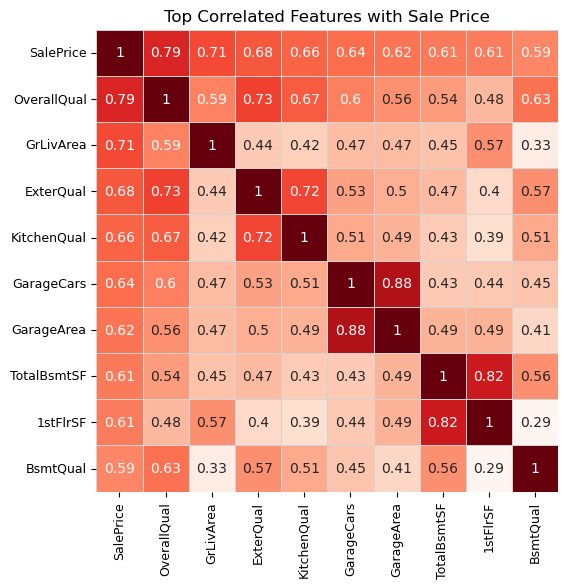

In [59]:
plt.figure(figsize=(6,6))
sns.heatmap(corr.loc[top_corr.index, top_corr.index], annot=True, cmap="Reds", square=True, linewidths=.5, linecolor='lightgrey', cbar=False)
plt.title("Top Correlated Features with Sale Price", fontsize=12)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()


### Living Area vs Sale Price
Create a scatter plot to visualize the relationship between above ground living area and sale price.

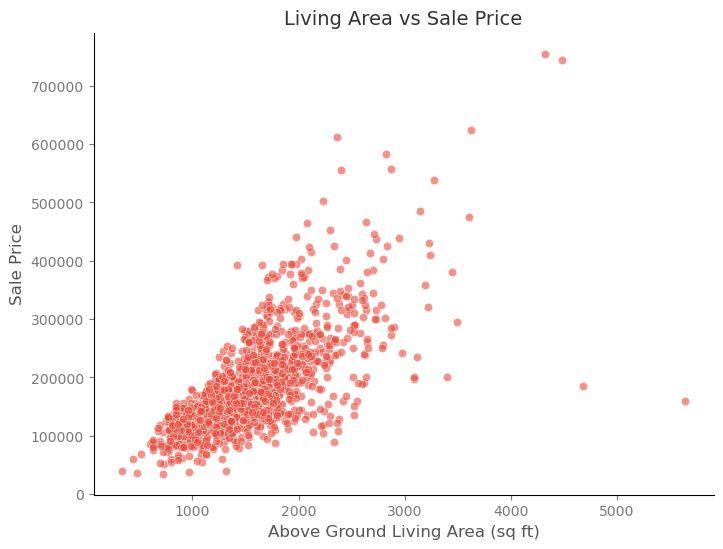

In [60]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train, alpha=0.6, color="#e74c3c", edgecolor="white", linewidth=0.5)
plt.title("Living Area vs Sale Price", fontsize=14, color="#333333")
plt.xlabel("Above Ground Living Area (sq ft)", fontsize=12, color="#555555")
plt.ylabel("Sale Price", fontsize=12, color="#555555")
plt.tick_params(axis='both', colors="#777777")
sns.despine()
plt.show()


### Overall Quality vs Sale Price
Generate a boxplot to compare sale prices across different overall quality categories.

C:\Users\87114\AppData\Local\Temp\ipykernel_15692\1391309178.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='OverallQual', y='SalePrice', data=train, palette=sns.color_palette("Reds", n_colors=10), linewidth=0.7)


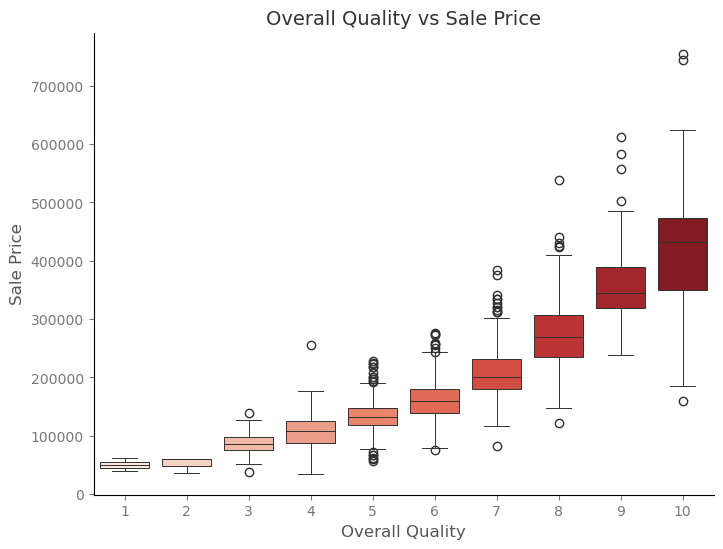

In [61]:
plt.figure(figsize=(8,6))
sns.boxplot(x='OverallQual', y='SalePrice', data=train, palette=sns.color_palette("Reds", n_colors=10), linewidth=0.7)
plt.title("Overall Quality vs Sale Price", fontsize=14, color="#333333")
plt.xlabel("Overall Quality", fontsize=12, color="#555555")
plt.ylabel("Sale Price", fontsize=12, color="#555555")
plt.tick_params(axis='both', colors="#777777")
sns.despine()
plt.show()


### Year Built vs Sale Price
Visualize the relationship between the year the house was built and its sale price using a scatter plot.

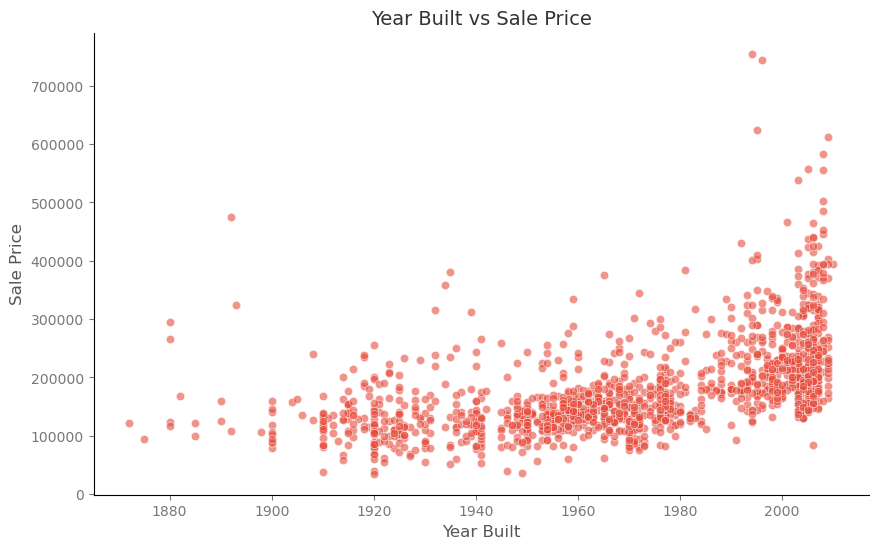

In [62]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='YearBuilt', y='SalePrice', data=train, alpha=0.6, color="#e74c3c", edgecolor="white", linewidth=0.5)
plt.title("Year Built vs Sale Price", fontsize=14, color="#333333")
plt.xlabel("Year Built", fontsize=12, color="#555555")
plt.ylabel("Sale Price", fontsize=12, color="#555555")
plt.tick_params(axis='both', colors="#777777")
sns.despine()
plt.show()


### Decade Built Analysis
Group houses by the decade they were built and calculate the average sale price for each decade.

In [63]:
if "YearBuilt" in train.columns:
    train["DecadeBuilt"] = (train["YearBuilt"] // 10) * 10
    decade_price = train.groupby("DecadeBuilt")["SalePrice"].mean()
    print("Average Sale Price by Decade Built:")
    print(decade_price)

Average Sale Price by Decade Built:
DecadeBuilt
1870    108000.000000
1880    170425.571429
1890    216316.666667
1900    129828.400000
1910    131511.482759
1920    123268.350515
1930    144415.833333
1940    126887.481013
1950    140935.670659
1960    153852.640000
1970    152828.335106
1980    190080.327869
1990    228404.220859
2000    242046.416021
2010    394432.000000
Name: SalePrice, dtype: float64


### Overall Quality Analysis
Calculate the average sale price for each overall quality category.

In [64]:
if "OverallQual" in train.columns:
    quality_group = train.groupby("OverallQual")["SalePrice"].mean()
    print("Average SalePrice by OverallQual:")
    print(quality_group)

Average SalePrice by OverallQual:
OverallQual
1      50150.000000
2      51770.333333
3      87473.750000
4     108420.655172
5     133523.347607
6     161603.034759
7     207716.423197
8     274735.535714
9     367513.023256
10    438588.388889
Name: SalePrice, dtype: float64


### Price Per Square Foot Analysis
Calculate the price per square foot for each house and display descriptive statistics.

In [65]:
if "GrLivArea" in train.columns:
    train["PricePerSF"] = train["SalePrice"] / train["GrLivArea"]
    print("Price Per Square Foot Summary:")
    print(train["PricePerSF"].describe())


Price Per Square Foot Summary:
count    1460.000000
mean      120.572878
std        31.391081
min        28.358738
25%        99.822008
50%       120.099031
75%       138.700041
max       276.250881
Name: PricePerSF, dtype: float64
